# Monte carlo examples

In [1]:
# Boilerplate
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pandas as pd
import math

# Throw a spherically symmetrical distribution

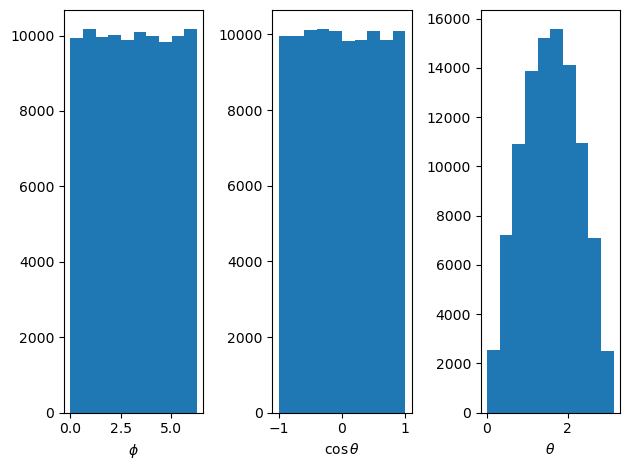

In [2]:
npoints = 100000
# randomly distribute cosine theta and phi
costheta = np.random.uniform(-1.,1.,npoints)
phi = np.random.uniform(0,2*math.pi,npoints)
# Create a Pandas dataframe
points = pd.DataFrame({'costheta':costheta,'phi':phi})
# Calculate theta
points['theta'] = np.arccos(points['costheta'])
# Histogram all three
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist(points['phi'])
ax1.set_xlabel(r'$\phi$')

ax2.hist(points['costheta'])
ax2.set_xlabel(r'$\cos\theta$')

ax3.hist(points['theta'])
ax3.set_xlabel(r'$\theta$')

plt.tight_layout()  # Fixes overlaps
plt.show()

In [3]:
# Now let's see how many hit a 50 cm target 5m away
L = 5.
points['tantheta']=np.tan(points['theta'])
points['rho'] = L*points['tantheta']
# Drop the backwards going tracks!
hits = points.query("costheta>0.")
# Drop the hits outside of the target.
hits = hits.query("rho<.5")
nhits = len(hits)
dnhits = math.sqrt(nhits*(1-nhits/npoints))
expected = npoints*(.5)**2/L**2/4
print("Nhits: %d +- %.1f, expected: %.1f (%.2f sigma)"%
      (nhits,dnhits,expected,(nhits-expected)/dnhits))

Nhits: 240 +- 15.5, expected: 250.0 (-0.65 sigma)


# Arbitrary distributions

In [4]:
# Returns N 1-D random numbesr based on the function myfunc, in the range xlo to xhi
# funcmax is the maximum value of funcmax
#
def mydist(func,N=1,xlo=0.,xhi=1.,funcmax=1.):
    s = np.empty(N)         # Generate an empty vector N long
    for i in range(0,N):   
        while (True):       # Loop until we find a "good" number
            x = np.random.uniform(xlo,xhi)
            if(func(x)>=funcmax*np.random.uniform()):
                break       # Exit the generation loop
        s[i]=x
    return s

In [5]:
# Theta distribution (range 0 to pi, max 1)
def thetadist(x):
    return(np.exp(-x))

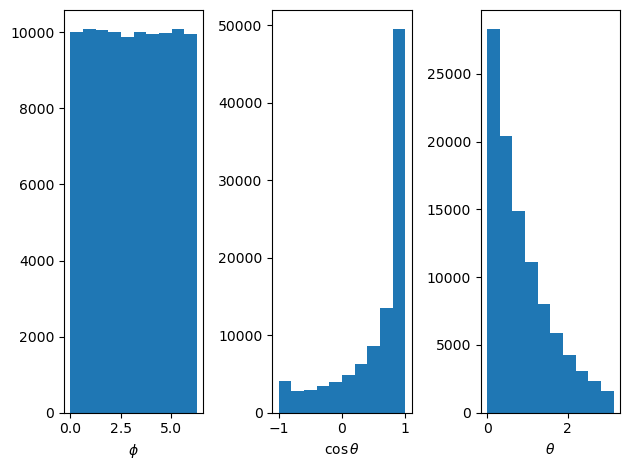

In [6]:
theta = mydist(thetadist,npoints,0.,math.pi,1)
phi = np.random.uniform(0,2*math.pi,npoints)
points = pd.DataFrame({'theta':theta,'phi':phi})
points['costheta'] = np.cos(points['theta'])
# Histogram all three
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist(points['phi'])
ax1.set_xlabel(r'$\phi$')

ax2.hist(points['costheta'])
ax2.set_xlabel(r'$\cos\theta$')

ax3.hist(points['theta'])
ax3.set_xlabel(r'$\theta$')

plt.tight_layout()  # Fixes overlaps
plt.show()

In [7]:
# Now let's see how many hit a 50 cm target 5m away
L = 5.
points['tantheta']=np.tan(points['theta'])
points['rho'] = L*points['tantheta']
# Drop the backwards going tracks!
hits = points.query("costheta>0.")
hits = hits.query("rho<.5")
newnhits = len(hits)
newdnhits = math.sqrt(nhits*(1-nhits/npoints))
print("Nhits: %d +- %.1f, compared to %d +- %.1f before"%
      (newnhits,newdnhits,nhits,dnhits))

Nhits: 9949 +- 15.5, compared to 240 +- 15.5 before
